# Digit Recognition

In [1]:
# Only run once, to download MNIST.

import urllib.request
import os

# Create an 'mnist' directory unless it exists:
LOCAL_DIR = './mnist/'
if not os.path.exists(LOCAL_DIR):
    os.makedirs(LOCAL_DIR)

# Download the four MNIST files from the official site:
MNIST_SITE = 'http://yann.lecun.com/exdb/mnist/'
TRAINING_IMAGES = 'train-images-idx3-ubyte.gz'
TRAINING_LABELS = 'train-labels-idx1-ubyte.gz'
TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

urllib.request.urlretrieve(MNIST_SITE + TRAINING_IMAGES, LOCAL_DIR + TRAINING_IMAGES)
urllib.request.urlretrieve(MNIST_SITE + TRAINING_LABELS, LOCAL_DIR + TRAINING_LABELS)
urllib.request.urlretrieve(MNIST_SITE + TEST_IMAGES, LOCAL_DIR + TEST_IMAGES)
urllib.request.urlretrieve(MNIST_SITE + TEST_LABELS, LOCAL_DIR + TEST_LABELS)

print("Data loaded")

Data loaded


overfitting : memoize the training data Doesnt know how to classify unseen data

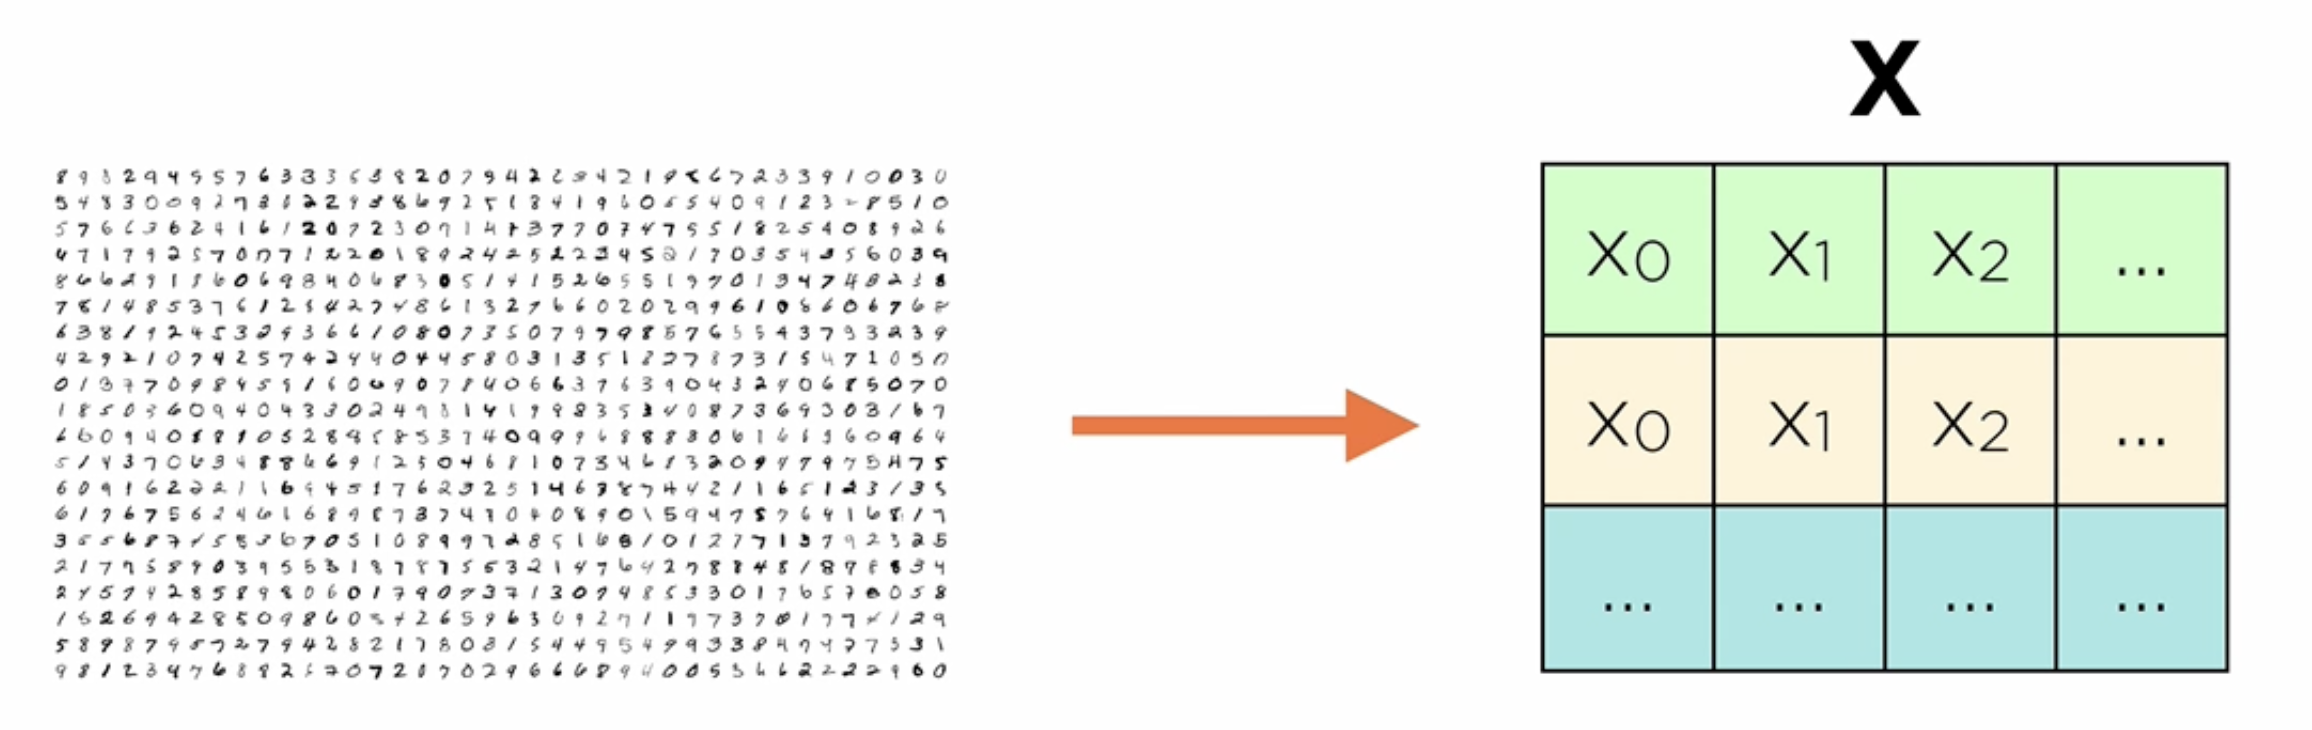

What we're going to do is to take each image in the dataset and squash it to a long row of pixels, and each pixel becomes an input variable. A byte in a row of the input matrix. An image is 28 x 28 pixels, 784 pixels in all, so we have 784 columns. This is a 784-dimensional problem, + another column full of 1s for the bias. So, X will be a big old matrix with 785 columns and 60, 000 rows, one per example.

In [2]:
import numpy as np
import gzip
import struct

def load_images(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Read the header information into a bunch of variables:
        _ignored, n_images, image_columns, image_rows = struct.unpack('>IIII', f.read(16))
        # Read all the pixels into a long NumPy array:
        all_pixels = np.frombuffer(f.read(), dtype=np.uint8)
        # Reshape the array into a matrix where each line is an image:
        images_matrix = all_pixels.reshape(n_images, image_columns * image_rows)
        # Add a bias column full of 1s as the first column in the matrix
        return np.insert(images_matrix, 0, 1, axis=1)

In [3]:
# 60000 images, each 785 elements (1 bias + 28 * 28 pixels)
X_train = load_images("./mnist/train-images-idx3-ubyte.gz")

# 10000 images, each 785 elements, with the same structure as X_train
X_test = load_images("./mnist/t10k-images-idx3-ubyte.gz")

In [5]:
X_train.shape

(60000, 785)

Now let's load the labels. Note that the system we're writing identifies the digit 4, so the labels that are originally 4 become 1, and the others become 0:

In [6]:
def load_labels(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Skip the header bytes:
        f.read(8)
        # Read all the labels into a list:
        all_labels = f.read()
        # Reshape the list of labels into a one-column matrix:
        labels_matrix = np.frombuffer(all_labels, dtype=np.uint8).reshape(-1, 1)
        # Encode the matrix so that all 4s become 1, and other digits become 0s:
        return (labels_matrix == 4).astype(int)

In [7]:
# 60K labels, each with value 1 if the digit is a five, and 0 otherwise
Y_train = load_labels("./mnist/train-labels-idx1-ubyte.gz")

# 10000 labels, with the same encoding as Y_train
Y_test = load_labels("./mnist/t10k-labels-idx1-ubyte.gz")

Previous classifier

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def predict(X, w):
    return sigmoid(np.matmul(X, w))

In [10]:
def loss(X, Y, w):
    predictions = predict(X, w)
    first_term = Y * np.log(predictions)
    second_term = (1 - Y) * np.log(1 - predictions)
    return -np.average(first_term + second_term)

In [11]:
def gradient(X, Y, w):
    return np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

In [12]:
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w

In [13]:
w = train(X_train, Y_train, iterations=200, lr=0.00001)

Iteration    0 => Loss: 0.69314718055994528623
Iteration    1 => Loss: 0.80017553516096073807
Iteration    2 => Loss: 0.55723828104553563279
Iteration    3 => Loss: 0.32973175390660292017
Iteration    4 => Loss: 0.18334562770359461026
Iteration    5 => Loss: 0.16726190795891721086
Iteration    6 => Loss: 0.15898112692349319897
Iteration    7 => Loss: 0.15231619727522435759
Iteration    8 => Loss: 0.14690314715421115555
Iteration    9 => Loss: 0.14226046885782328566
Iteration   10 => Loss: 0.13819528582968026997
Iteration   11 => Loss: 0.13458801318399327140
Iteration   12 => Loss: 0.13135763336291331194
Iteration   13 => Loss: 0.12844347920976570410
Iteration   14 => Loss: 0.12579789856333772891
Iteration   15 => Loss: 0.12338265705502206304
Iteration   16 => Loss: 0.12116664919212588591
Iteration   17 => Loss: 0.11912428830004077873
Iteration   18 => Loss: 0.11723432263009328502
Iteration   19 => Loss: 0.11547894406452018090
Iteration   20 => Loss: 0.11384310912932418813
Iteration   2

In [14]:
np.round(predict(X_test, w))[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [15]:
Y_test[0:10]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0]])